# Predicting depression and anxiety in college students during the Argentinean quarantine for the COVID-19 pandemic

# 1 of 5. Performing an initial inspection of the data

The data was collected for the study entitled "A longitudinal study on depression and anxiety in college students during the first 106-days of the lengthy Argentinean quarantine for the COVID-19 pandemic" by López Steinmetz et al., published in the Journal of Mental Health in 2021. To access the data, visit https://osf.io/2v84n/.

In this Jupyter notebook, we perform an initial inspection of the data before proceeding with the classification and regression tasks in the notebooks that follow. For additional information about the data, visit https://doi.org/10.1080/09638237.2021.1952952.

In [1]:
# Load 'dataset.xlsx' file as pandas DataFrame to keep tabular format
import pandas as pd

data = pd.read_excel('/Users/margaritasison/Downloads/M3.5 Lab Rotation 3/dataset.xlsx', sheet_name=0, header=0) # data = pd.read_excel('Edit string path accordingly', load first sheet, set first row as header)

In [2]:
# Print some information about 'data' such as column names, data types and non-null value counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   participant          1492 non-null   int64 
 1   ADEPRESSION          1492 non-null   int64 
 2   BDEPRESSION          1492 non-null   int64 
 3   AANXIETY             1492 non-null   int64 
 4   BANXIETY             1492 non-null   int64 
 5   quarantinesubperiod  1492 non-null   object
 6   sex                  1492 non-null   object
 7   age                  1492 non-null   int64 
 8   mentdishist          1492 non-null   object
 9   suic                 1492 non-null   object
dtypes: int64(6), object(4)
memory usage: 116.7+ KB


In [3]:
# View the first and last five rows of 'data'
data

,participant,ADEPRESSION,BDEPRESSION,AANXIETY,BANXIETY,quarantinesubperiod,sex,age,mentdishist,suic
0,1,13,1,33,21,quar first,woman,22,no,no
1,2,16,11,21,14,quar first,woman,24,no,yes
2,3,5,11,20,23,quar first,woman,30,no,yes
3,4,28,24,41,41,quar first,woman,22,yes,yes
4,5,17,17,37,35,quar first,woman,25,no,yes
...,...,...,...,...,...,...,...,...,...,...
1487,1488,9,14,26,29,quar first,woman,29,yes,no
1488,1489,52,45,49,51,quar second,woman,18,yes,yes
1489,1490,25,19,40,36,quar third,woman,20,no,no
1490,1491,27,40,36,43,quar third,man,31,yes,yes


In [4]:
# Print column descriptions
column_descr = {'column': ['participant', 'ADEPRESSION', 'BEPRESSION', 'AANXIETY', 'BANXIETY', 'quarantinesubperiod', 'sex', 'age', 'mentdishist', 'suic'], 'description': ['Argentinean college students who completed the online survey for both the first and follow-up measurements, N = 1492', 'raw scores in the Beck Depression Inventory (Argentinean version) from the first measurement', 'raw scores in the Beck Depression Inventory (Argentinean version) from the follow-up measurement', 'raw scores in the State-Trait Anxiety Inventory (anxiety trait subscale, Spanish version) from the first measurement', 'raw scores in the State-Trait Anxiety Inventory (anxiety trait subscale, Spanish version) from the follow-up measurement', 'broad quarantine subperiod to which responses were assigned based on the date of response for the first measurement', 'biological sex of the participant', 'age of the participant', 'response to the question “Have you ever been diagnosed with a mental problem (for example: depression, anxiety, obsession, or any other)?”', 'response to the question “Have you ever attempted suicide or have you ever thought about it?”']}
column_descr = pd.DataFrame(column_descr)

pd.set_option('display.max_colwidth', None)
print(column_descr)

                column  \
0          participant   
1          ADEPRESSION   
2           BEPRESSION   
3             AANXIETY   
4             BANXIETY   
5  quarantinesubperiod   
6                  sex   
7                  age   
8          mentdishist   
9                 suic   

                                                                                                                                  description  
0                        Argentinean college students who completed the online survey for both the first and follow-up measurements, N = 1492  
1                                                raw scores in the Beck Depression Inventory (Argentinean version) from the first measurement  
2                                            raw scores in the Beck Depression Inventory (Argentinean version) from the follow-up measurement  
3                        raw scores in the State-Trait Anxiety Inventory (anxiety trait subscale, Spanish version) from the first measure

In [5]:
# Generate descriptive statistics
data.describe(include='all')

# For object data:
    # 'unique' is the number of unique values
    # 'top' is the most common value
    # 'freq' is the most common value’s frequency

,participant,ADEPRESSION,BDEPRESSION,AANXIETY,BANXIETY,quarantinesubperiod,sex,age,mentdishist,suic
count,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492,1492,1492.000000,1492,1492
unique,NaN,NaN,NaN,NaN,NaN,3,2,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,quar first,woman,NaN,no,no
freq,NaN,NaN,NaN,NaN,NaN,866,1260,NaN,1099,754
mean,746.500000,19.161528,18.780161,30.301609,29.420912,NaN,NaN,23.587131,NaN,NaN
std,430.847614,11.008748,12.237694,11.463653,12.407286,NaN,NaN,5.876191,NaN,NaN
min,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,17.000000,NaN,NaN
25%,373.750000,10.000000,10.000000,22.000000,20.000000,NaN,NaN,20.000000,NaN,NaN
50%,746.500000,18.000000,16.000000,31.000000,29.000000,NaN,NaN,22.000000,NaN,NaN
75%,1119.250000,26.000000,26.000000,39.000000,39.000000,NaN,NaN,25.000000,NaN,NaN


Text(0, 0.5, 'Age')

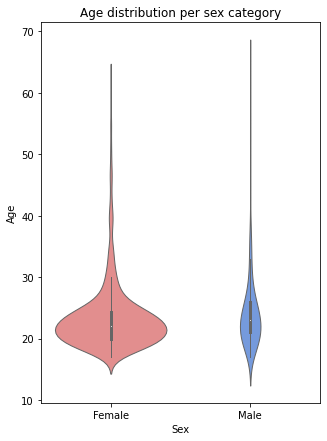

In [6]:
# Make a violin plot of the age distribution per sex category
import matplotlib.pyplot as plt
import seaborn as sns

data['sex'] = data['sex'].replace({'man': 'Male', 'woman': 'Female'})

plt.figure(figsize=(5, 7))

age_sex_distr = sns.violinplot(data=data, x='sex', y='age', scale='count', inner='box', linewidth=1, palette={'lightcoral', 'cornflowerblue'})
# scale: The method used to scale the width of each violin
    # If 'count', the width of the violins will be scaled by the number of observations in that bin

age_sex_distr.set_title("Age distribution per sex category")
age_sex_distr.set_xlabel("Sex")
age_sex_distr.set_ylabel("Age")

Text(0.5, 1, 'Scatter plots and histograms of continuous variables')

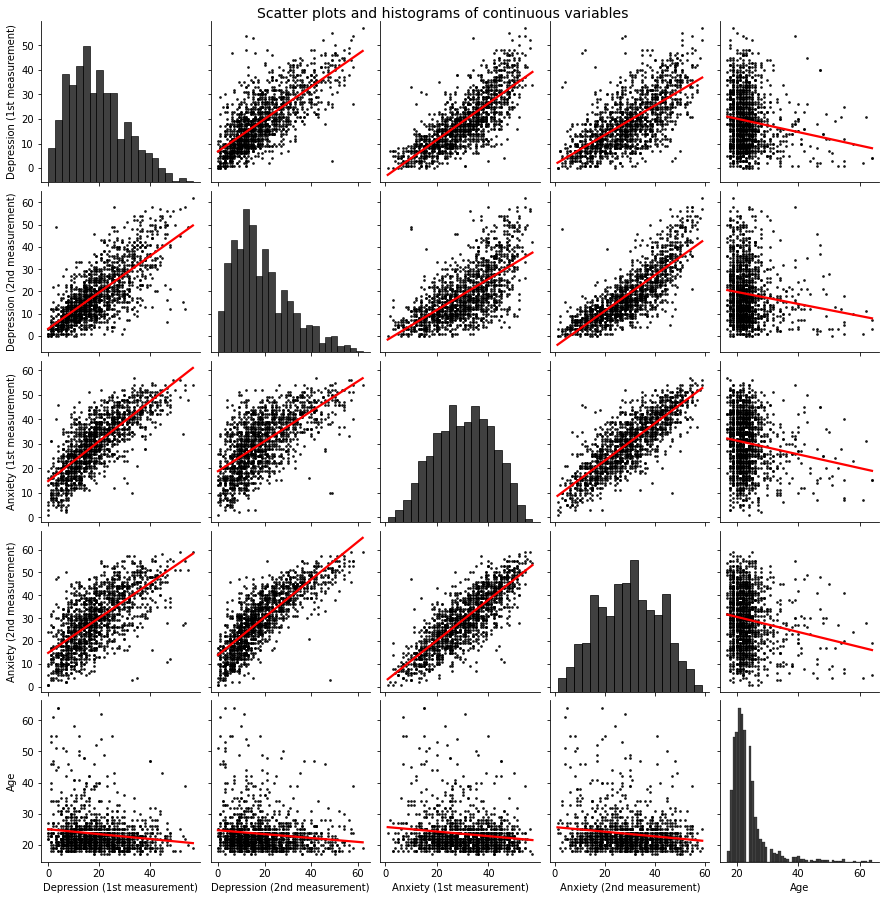

In [7]:
# Make pair plots of the continuous variables
data_pairplot = data.drop(['participant', 'quarantinesubperiod', 'sex', 'mentdishist', 'suic'], axis=1)
data_pairplot = data_pairplot.rename(columns={"ADEPRESSION": "Depression (1st measurement)", "BDEPRESSION": "Depression (2nd measurement)", "AANXIETY": "Anxiety (1st measurement)", "BANXIETY": "Anxiety (2nd measurement)", "age": "Age"})

pairplot = sns.pairplot(data_pairplot, kind='reg', plot_kws={'ci': None, 'color': 'red', 'scatter_kws': {'color': 'black', 's': 3}}, diag_kws={'color': 'black'})
# kind:'reg' plots a linear regression model fit

pairplot.fig.suptitle("Scatter plots and histograms of continuous variables", size=14, y=1) 

Text(0.5, 1.0, 'Heatmap of correlations between continuous variables')

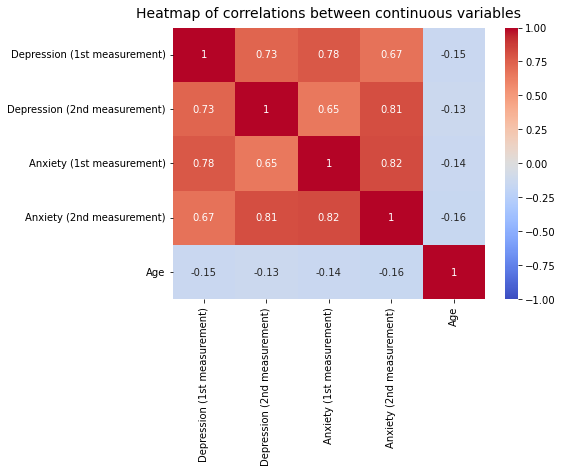

In [8]:
# Generate a heatmap of correlations between continuous variables
plt.figure(figsize=(7, 5))

heatmap = sns.heatmap(data_pairplot.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

heatmap.set_title("Heatmap of correlations between continuous variables", fontdict={"fontsize":14}, pad=10)

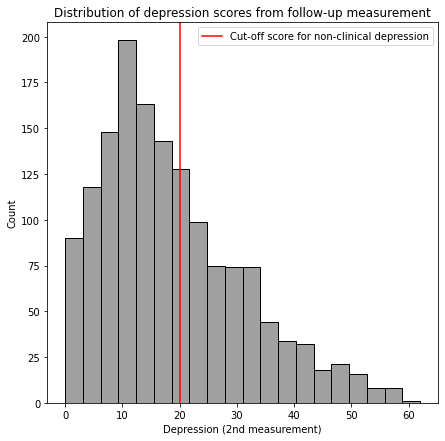

In [9]:
# Plot the distribution of depression scores from the follow-up measurement
plt.figure(figsize=(7,7))

sns.histplot(data=data_pairplot, x='Depression (2nd measurement)', color='gray', bins=20)

plt.title('Distribution of depression scores from follow-up measurement')

# Add a line delineating cut-off score
plt.axvline(x=20, color='red', label='Cut-off score for non-clinical depression')
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')

plt.show()

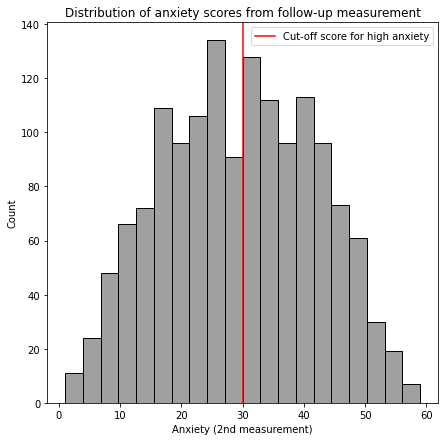

In [10]:
# Plot the distribution of depression scores from the follow-up measurement
plt.figure(figsize=(7,7))

sns.histplot(data=data_pairplot, x='Anxiety (2nd measurement)', color='gray', bins=20)

plt.title('Distribution of anxiety scores from follow-up measurement')

# Add a line delineating cut-off score
plt.axvline(x=30, color='red', label='Cut-off score for high anxiety')
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')

plt.show()